In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets, cross_validation, metrics, neighbors
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
classification_problem = datasets.make_classification(n_samples = 150, n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 6)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
k_for_plots = [5, 15, 40, 75]
ar_accuracy = [0 for i in range(5)]
accuracy = [0 for i in range(100)]

In [4]:
def plot_2d_dataset(data, colors):
    plt.figure(figsize(8, 8))
    plt.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

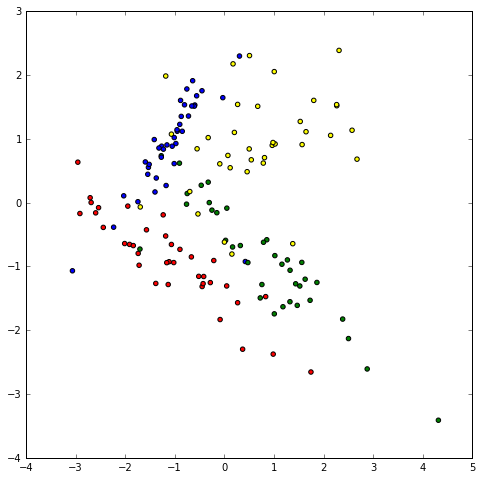

In [5]:
plot_2d_dataset(classification_problem, colors)

In [6]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [7]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [8]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Для k равных 5, 15, 40 и 75 визуализируем разделяющие поверхности, получаемые при решение задачи классификации методом kNN

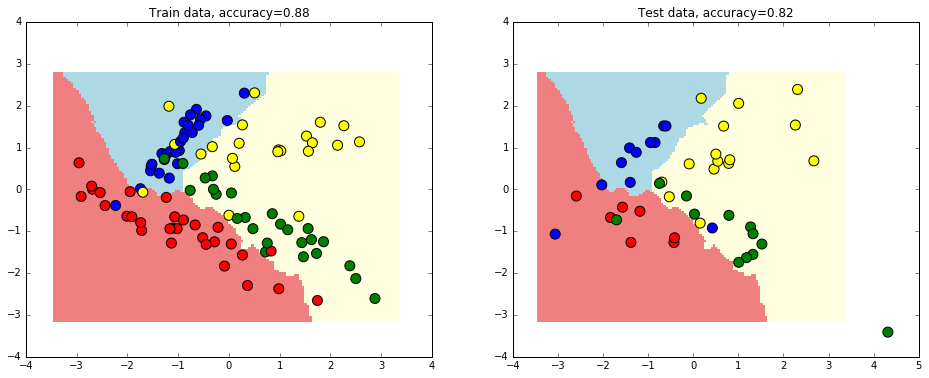

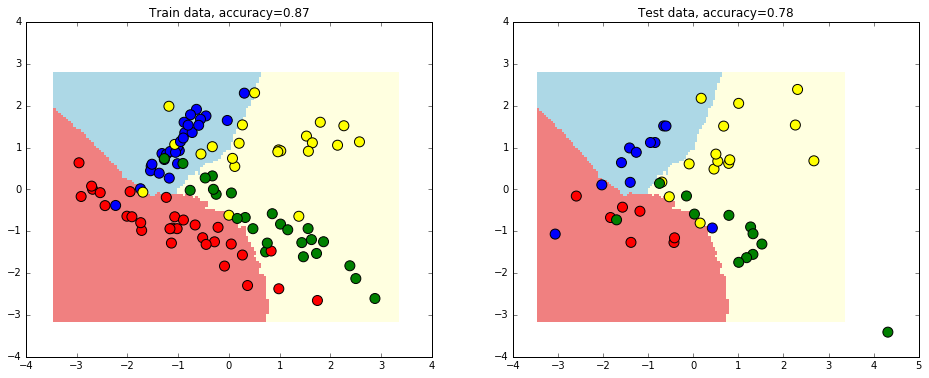

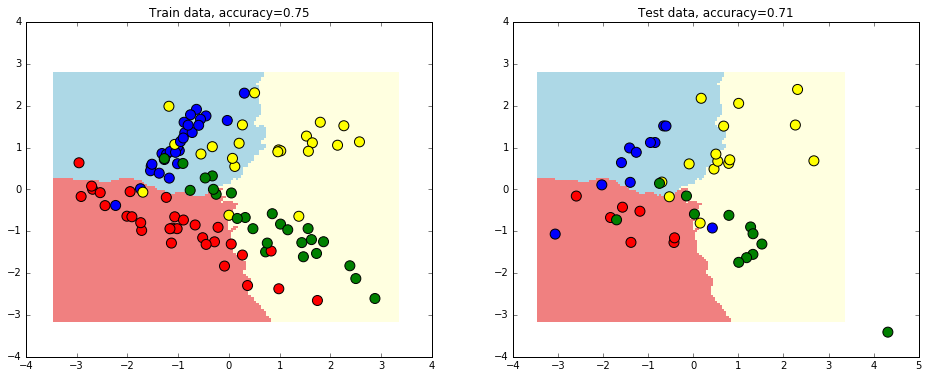

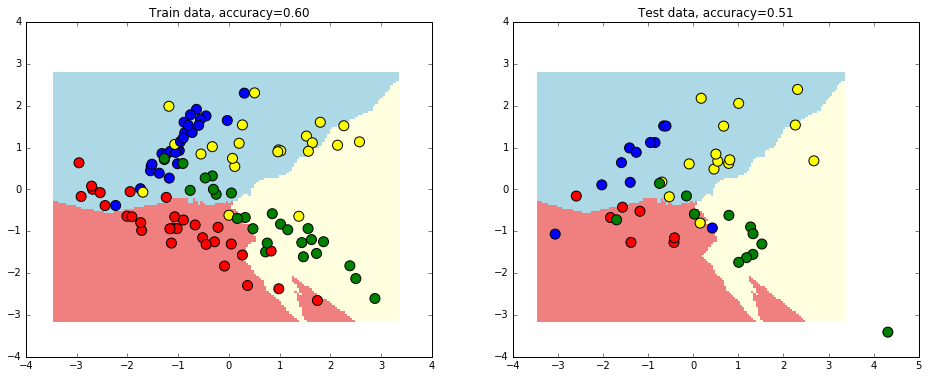

In [9]:
for k in range(1,101):
    estimator = neighbors.KNeighborsClassifier(n_neighbors = k)
    l = 0
    for train_indices, test_indices in cross_validation.KFold(150, n_folds = 5):
        estimator.fit(train_data, train_labels)
        ar_accuracy[l] = metrics.accuracy_score(test_labels, estimator.predict(test_data))
        l = l + 1
    accuracy[k - 1] = np.mean(ar_accuracy)
    if k in k_for_plots:
        plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

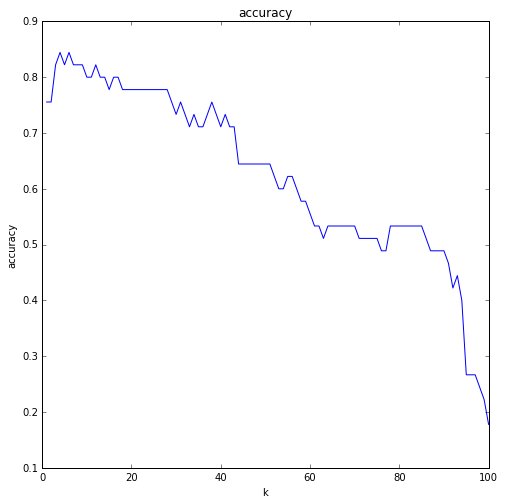

In [16]:
pyplot.plot(k, accuracy)
pyplot.title("accuracy")
pyplot.xlabel("k")
pyplot.ylabel("accuracy")

### Для k равных 4 и 6 точность максимальна